In [41]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

Sistema no lineal 1

In [42]:
G1=(lambda x,y: np.log((x**2)+(y**2)) - np.sin(x*y) - (np.log(2)) -np.log(np.pi), \
   lambda x,y: np.exp(x-y)+ np.cos(x*y))

In [43]:
def GetF1(G,r):
    
    n = r.shape[0]
    
    v = np.zeros_like(r)
    
    for i in range(n):
        v[i] = G[i](r[0],r[1])
        
    return v

In [44]:
GetF1(G1,np.array([2.,2.]))

array([0.99836697, 0.34635638])

In [45]:
def Metric1(G,r):
    return 0.5*np.linalg.norm(GetF1(G,r))**2

In [46]:
def GetJacobian1(f,r,h=1e-6):
    
    n = r.shape[0]
    
    J = np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            
            rf = r.copy()
            rb = r.copy()
            
            rf[j] = rf[j] + h
            rb[j] = rb[j] - h
            
            J[i,j] = ( f[i](rf[0],rf[1]) - f[i](rb[0],rb[1]))/(2*h)
            
    
    return J

In [47]:
GetJacobian1(G1,np.array([2.,2.]))

array([[1.80728724, 1.80728724],
       [2.51360499, 0.51360499]])

In [48]:
"Newton Raphson"

'Newton Raphson'

In [49]:
def NewtonRaphson(G,r,itmax=1000,error=1e-9):
    
    it = 0
    d = 1.
    dvector = []
    
    while d > error and it < itmax:
        
        # Vector actual
        rc = r
        
        F = GetF1(G,rc)
        J = GetJacobian1(G,rc)
        InvJ = np.linalg.inv(J)
        
        r = rc - np.dot(InvJ,F)
        
        diff = r - rc
        
        d = np.max( np.abs(diff) )
        
        dvector.append(d)
        #print(dvector)
        
        it += 1
    
    print(it)
    return r,dvector

In [50]:
x1sol1,_ = NewtonRaphson(G1,np.array([2.,2.]))
x1sol1

6


array([1.77245385, 1.77245385])

In [51]:
G1[1](x1sol1[0],x1sol1[1])

0.0

Descenso del gradiente

In [52]:
def GetFig(R,M,it):
    
    fig = plt.figure(figsize=(6,3))
    
    ax = fig.add_subplot(1,2,1)
    ax1 = fig.add_subplot(1,2,2)
    
    ax.plot(R[:it])
    
    ax1.plot(M[:it])
   
    plt.show()

In [53]:
def Minimizer1(G,r,lr=1e-2,epochs=int(1e4),error=1e-14):
    
    metric = 1
    it = 0
    
    M = np.array([])
    R = np.array([r])
    
    while metric > error and it < epochs:
        
        M = np.append(M,Metric1(G,r))
        
        J = GetJacobian1(G,r)
        Vector = GetF1(G,r)
        
        # Machine learning
        r -= lr*np.dot(J,Vector)
        
        R = np.vstack((R,r))
        
        metric = Metric1(G,r)
        
        it += 1
        
        if it%50 == 0:
            clear_output(wait=True)
            GetFig(R,M,it)
            print(r)
            time.sleep(0.001)
    
    return r

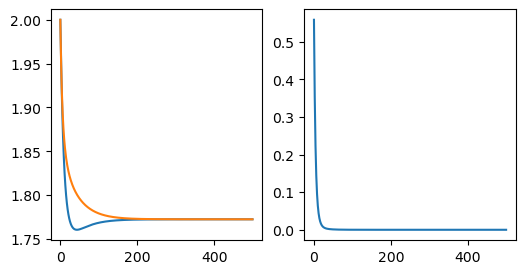

[1.77245372 1.77245408]


In [54]:
x1sol2 = Minimizer1(G1,np.array([2.,2.]))

Sistema no lineal 2

In [55]:
G2=(lambda x,y,z: 6*x - 2*np.cos(y*z)-1, \
   lambda x,y,z: 9*y + np.sqrt((x**2)+np.sin(z)+1.06)+0.9,\
   lambda x,y,z: 60*z + (3*(1/np.exp(x*y))) + 10 * np.pi -3)

In [56]:
def GetF2(G,r):
    
    n = r.shape[0]
    
    v = np.zeros_like(r)
    
    for i in range(n):
        v[i] = G[i](r[0],r[1],r[2])   
    return v

In [57]:
GetF2(G2,np.array([0.,0.,0.]))

array([-3.        ,  1.92956301, 31.41592654])

In [58]:
def Metric2(G,r):
    return 0.5*np.linalg.norm(GetF2(G,r))**2

In [59]:
def GetJacobian2(f,r,h=1e-6):
    
    n = r.shape[0]
    
    J = np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            
            rf = r.copy()
            rb = r.copy()
            
            rf[j] = rf[j] + h
            rb[j] = rb[j] - h
            
            J[i,j] = ( f[i](rf[0],rf[1],rf[2]) - f[i](rb[0],rb[1],rb[2])  )/(2*h)
            
    
    return J

In [60]:
GetJacobian2(G2,np.array([0.,0.,0.]))

array([[ 6.        ,  0.        ,  0.        ],
       [ 0.        ,  9.        ,  0.48564293],
       [ 0.        ,  0.        , 60.        ]])

Newton Rapson

In [65]:
def NewtonRaphson2(G,r,itmax=1000,error=1e-9):
    
    it = 0
    d = 1.
    dvector = []
    
    while d > error and it < itmax:
        
        # Vector actual
        rc = r
        
        F = GetF2(G,rc)
        J = GetJacobian2(G,rc)
        InvJ = np.linalg.inv(J)
        
        r = rc - np.dot(InvJ,F)
        
        diff = r - rc
        
        d = np.max( np.abs(diff) )
        
        dvector.append(d)
        #print(dvector)
        
        it += 1
    
    print(it)
    return r,dvector

In [62]:
x2sol1,_ = NewtonRaphson2(G2,np.array([0.,0.,0.]))
x2sol1

[0.5235987756181211]
[0.5235987756181211, 0.013464494608999344]
[0.5235987756181211, 0.013464494608999344, 1.3125552370152338e-05]
[0.5235987756181211, 0.013464494608999344, 1.3125552370152338e-05, 7.48751061152575e-12]
4


array([ 0.49814468, -0.1996059 , -0.52882598])

Descenso del gradiente

In [66]:
def Minimizer2(G,r,lr=1e-5,epochs=int(1e4),error=1e-7):
    
    metric = 1
    it = 0
    
    M = np.array([])
    R = np.array([r])
    
    while metric > error and it < epochs:
        
        M = np.append(M,Metric2(G,r))
        
        J = GetJacobian2(G,r)
        Vector = GetF2(G,r)
        
        # Machine learning
        r -= lr*np.dot(J,Vector)
        
        R = np.vstack((R,r))
        
        metric = Metric2(G,r)
        
        it += 1
        
        if it%50 == 0:
            clear_output(wait=True)
            GetFig(R,M,it)
            print(r)
            time.sleep(0.001)
    
    return r

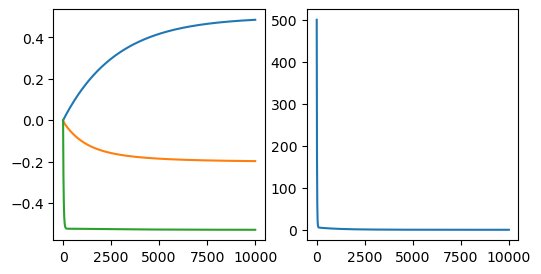

[ 0.48486147 -0.1972401  -0.52859357]


In [67]:
x2sol2= Minimizer2(G2,np.array([0.,0.,0.]))